Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.0244 - mae: 0.0547 - mse: 0.0244 - val_loss: 9.0207e-04 - val_mae: 0.0094 - val_mse: 9.0207e-04
Epoch 2/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 8.1193e-04 - mae: 0.0082 - mse: 8.1193e-04 - val_loss: 8.1071e-04 - val_mae: 0.0076 - val_mse: 8.1071e-04
Epoch 3/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 7.4936e-04 - mae: 0.0071 - mse: 7.4936e-04 - val_loss: 7.9240e-04 - val_mae: 0.0077 - val_mse: 7.9240e-04
Epoch 4/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 7.4095e-04 - mae: 0.0071 - mse: 7.4095e-04 - val_loss: 7.6389e-04 - val_mae: 0.0068 - val_mse: 7.6389e-04
Epoch 5/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 7.2863e-04 - mae: 0.0070 - mse: 7.2863e-04 - val_loss: 7.6069e-04 - val_mae: 0.0064 - val_mse: 7.6069e-04
Epoch 6/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 7.3210e-04 - mae: 0.0070 - mse: 7.3210e-04 - val_loss: 7.5131e-04 - val_mae: 0.0066 - va

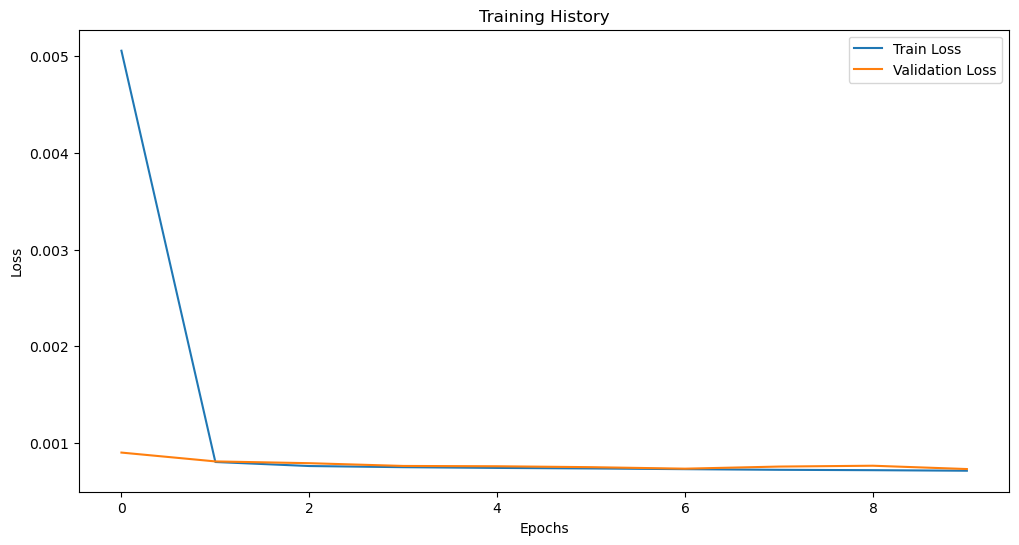

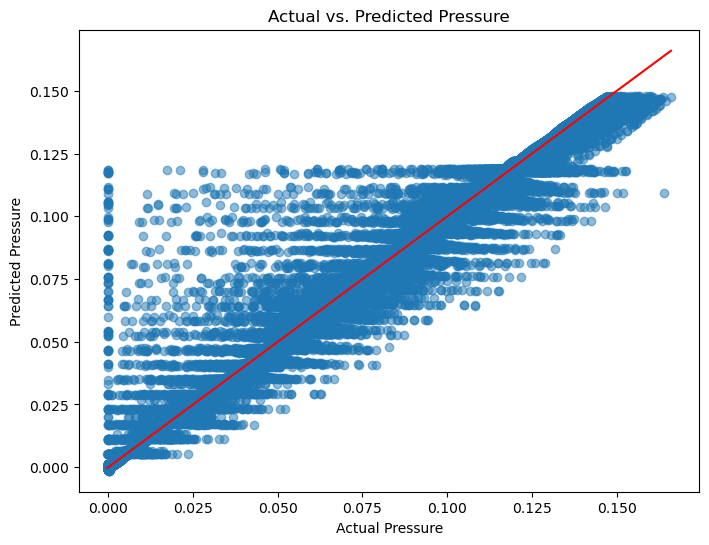


Pressure Model Weights:
Layer: hidden1
Weights: [[ 2.45105520e-01  9.13692347e-05  7.82618183e-04  3.19861531e-01
   2.67304061e-03 -1.27334923e-01 -2.30784505e-03  4.31949496e-01
  -3.02820295e-01  3.49383742e-01 -2.22532913e-01 -4.14201885e-01
  -6.15853012e-01 -2.02684373e-01 -1.16928823e-01  4.49054278e-02]
 [ 4.75204438e-01  8.03781986e-01  7.34866480e-04  2.06238732e-01
  -8.23830903e-01  3.29822116e-02 -6.11851692e-01 -2.33884126e-01
  -5.91304719e-01  6.35376051e-02 -4.23961788e-01 -7.18824342e-02
   2.46271506e-01 -9.77082551e-02  8.03292274e-01  6.83816910e-01]
 [ 3.54267746e-01 -7.72073209e-01 -4.70221490e-01 -3.28631848e-01
   7.90994465e-01  2.40510166e-01  5.91268837e-01  1.89113304e-01
  -4.41440910e-01 -8.00948262e-01 -3.18594009e-01 -7.28017390e-02
  -1.58828050e-01  1.60678744e-01 -7.60904968e-01 -6.69195592e-01]
 [ 1.90523341e-02  8.81476142e-03 -4.23017074e-04  1.59422786e-03
  -5.42226015e-03 -7.16667483e-03 -1.00631695e-02 -7.49904476e-03
  -2.19822936e-02  3.212

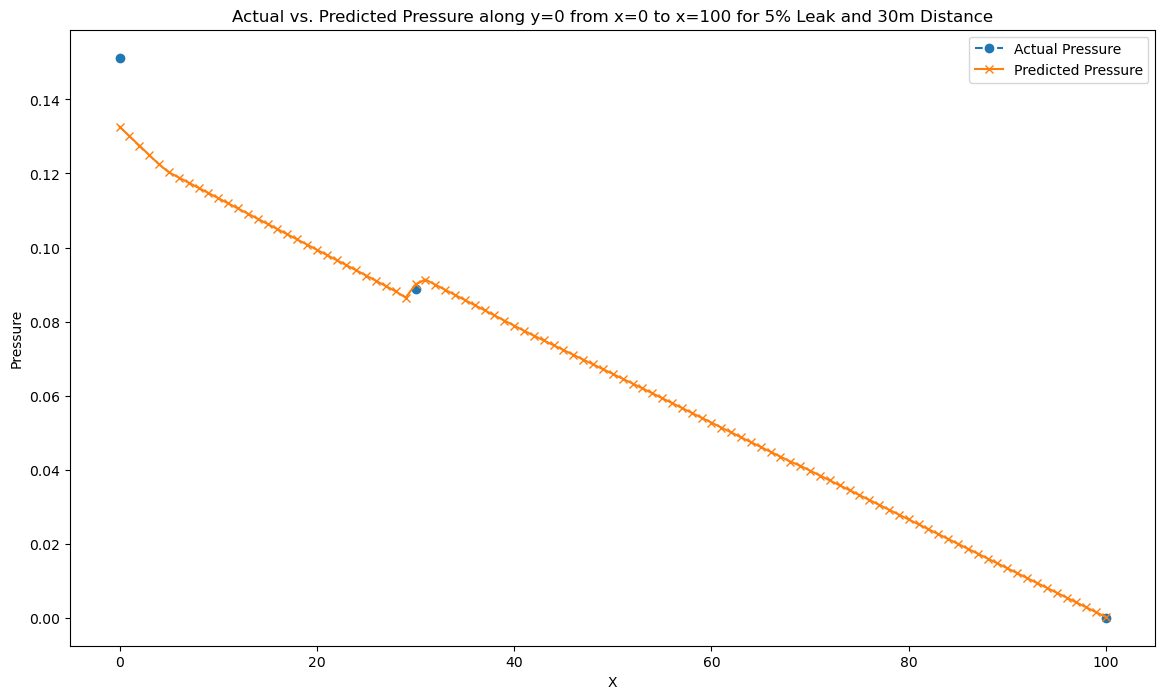

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the folder containing the data files
data_folder = 'data'

# Define the percentages and distances
percentages = [2.5, 5, 7.5]
distances = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Function to load additional input data and output data from a text file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skip the first row
        for line in lines:
            try:
                data.append(list(map(float, line.strip().split(',')[1:])))  # Split on commas, skip the first column, convert to float
            except ValueError:
                continue  # Skip lines that can't be converted to float
    data = np.array(data)
    additional_input = data[:, :2]  # First 2 columns are the additional input features
    output = data[:, 2]             # The first column is the target output (pressure)
    return additional_input, output

# Improved function to extract percentage and distance from file path
def extract_percentage_distance(file_path):
    filename = os.path.basename(file_path)
    percentage, distance = filename.split('_')
    percentage = float(percentage[:-1])
    distance = float(distance[:-5])
    return percentage, distance

# Collect all file paths
file_paths = []
for percentage in percentages:
    for distance in distances:
        file_path = os.path.join(data_folder, f'{percentage}%_{distance}m.txt')
        if os.path.exists(file_path):
            file_paths.append(file_path)

# Load all data to fit the scalers
all_input = []
all_output = []

for file_path in file_paths:
    additional_input, output = load_data(file_path)
    percentage, distance = extract_percentage_distance(file_path)
    predefined_input = np.array([[percentage, distance]] * additional_input.shape[0])
    full_input = np.hstack((predefined_input, additional_input))
    all_input.append(full_input)
    all_output.append(output)

all_input = np.vstack(all_input)
all_output = np.hstack(all_output)

# Normalize the input data
input_scaler = StandardScaler()
all_input_scaled = input_scaler.fit_transform(all_input)

# Normalize the output data
output_scaler = StandardScaler()
all_output_scaled = output_scaler.fit_transform(all_output.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_input_scaled, all_output_scaled, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1000).shuffle(buffer_size=1024)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1000)

# Define the model architecture
def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='input_layer')
    hidden1 = Dense(16, activation='relu', name='hidden1')(input_layer)
    hidden2 = Dense(8, activation='relu', name='hidden2')(hidden1)
    hidden3 = Dense(4, activation='relu', name='hidden3')(hidden2)
    output_layer = Dense(1, activation='linear', name='output_layer')(hidden3)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Build and compile the model
model = build_model((4,))  # Adjusted input shape
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Increased the number of epochs
    validation_data=test_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the model
loss, mse, mae = model.evaluate(test_dataset)

# Calculate R^2 score
predictions_scaled = model.predict(X_test)
predictions = output_scaler.inverse_transform(predictions_scaled.flatten().reshape(-1, 1)).flatten()
y_test_original = output_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
r2 = r2_score(y_test_original, predictions)

# Print the evaluation metrics
print(f'Loss: {loss}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted pressure
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r')
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Actual vs. Predicted Pressure')
plt.show()

# Function to get layer weights
def get_layer_weights(model):
    for layer in model.layers:
        if hasattr(layer, 'kernel'):
            weights, biases = layer.get_weights()
            print(f'Layer: {layer.name}')
            print(f'Weights: {weights}')
            print(f'Biases: {biases}\n')

print('\nPressure Model Weights:')
get_layer_weights(model)

# Function to predict new values
def predict_new_value(model, input_scaler, output_scaler, new_input):
    new_input_scaled = input_scaler.transform(new_input)
    prediction_scaled = model.predict(new_input_scaled)
    prediction = output_scaler.inverse_transform(prediction_scaled)
    return prediction

# Example usage of predict_new_value function
new_input = np.array([[2.5, 20, 1.2, 0.8]])
new_pressure_prediction = predict_new_value(model, input_scaler, output_scaler, new_input)

print('Predicted Pressure:', new_pressure_prediction)

# Plot actual and predicted pressure along y=0 from x=0 to x=100 for one leak distance and diameter
# Here we choose one distance and diameter from the dataset for plotting
chosen_percentage = 5
chosen_distance = 30

intervals = np.linspace(0, 100, 101)
actual_values = []
predicted_values = []

for x in intervals:
    # Retrieve the actual values from the dataset
    condition = (all_input[:, 0] == chosen_percentage) & (all_input[:, 1] == chosen_distance) & (all_input[:, 2] == x)
    actual_value = all_output[condition]
    actual_values.append(actual_value[0] if len(actual_value) > 0 else np.nan)
    
    # Get the predicted values from the model
    input_data = np.array([[chosen_percentage, chosen_distance, x, 0]])
    predicted_pressure = predict_new_value(model, input_scaler, output_scaler, input_data)
    predicted_values.append(predicted_pressure.flatten()[0])

plt.figure(figsize=(14, 8))
plt.plot(intervals, actual_values, label='Actual Pressure', linestyle='--', marker='o')
plt.plot(intervals, predicted_values, label='Predicted Pressure', linestyle='-', marker='x')
plt.xlabel('X')
plt.ylabel('Pressure')
plt.title(f'Actual vs. Predicted Pressure along y=0 from x=0 to x=100 for {chosen_percentage}% Leak and {chosen_distance}m Distance')
plt.legend()
plt.show()


In [4]:
def predict_new_value(model, input_scaler, output_scaler, new_input):
    new_input_scaled = input_scaler.transform(new_input)
    prediction_scaled = model.predict(new_input_scaled)
    prediction = output_scaler.inverse_transform(prediction_scaled)
    return prediction

# Save predicted pressure data from x=0 to x=100 along y=0
chosen_percentage = 5
chosen_distance = 30

intervals = np.linspace(0, 100, 101)
predicted_values = []

for x in intervals:
    input_data = np.array([[chosen_percentage, chosen_distance, x, 0]])
    predicted_pressure = predict_new_value(model, input_scaler, output_scaler, input_data)
    predicted_values.append(predicted_pressure.flatten()[0])

# Save predictions to an Excel file
output_file = 'predicted_pressure_data.xlsx'
df = pd.DataFrame({'X': intervals, 'Predicted Pressure': predicted_values})
df.to_excel(output_file, index=False)

print(f'Predicted pressure data saved to {output_file}')

# Plot predicted pressure along y=0 from x=0 to x=100 for chosen_percentage and chosen_distance
plt.figure(figsize=(14, 8))
plt.plot(intervals, predicted_values, label='Predicted Pressure', linestyle='-', marker='x')
plt.xlabel('X')
plt.ylabel('Pressure')
plt.title(f'Predicted Pressure along y=0 from x=0 to x=100 for {chosen_percentage}% Leak and {chosen_distance}m Distance')
plt.legend()
plt.show()

ValueError: X has 4 features, but StandardScaler is expecting 5 features as input.

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.1247 - mae: 0.1821 - mse: 0.1247 - val_loss: 0.0095 - val_mae: 0.0594 - val_mse: 0.0095
Epoch 2/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0093 - mae: 0.0600 - mse: 0.0093 - val_loss: 0.0086 - val_mae: 0.0584 - val_mse: 0.0086
Epoch 3/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0083 - mae: 0.0569 - mse: 0.0083 - val_loss: 0.0081 - val_mae: 0.0563 - val_mse: 0.0081
Epoch 4/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0080 - mae: 0.0554 - mse: 0.0080 - val_loss: 0.0082 - val_mae: 0.0568 - val_mse: 0.0082
Epoch 5/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0076 - mae: 0.0538 - mse: 0.0076 - val_loss: 0.0071 - val_mae: 0.0514 - val_mse: 0.0071
Epoch 6/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.0073 - mae: 0.0529 - mse: 0.0073 - val_loss: 0.0071 - val_mae: 0.0514 - val_mse: 0.0071
Epoch 7/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.007

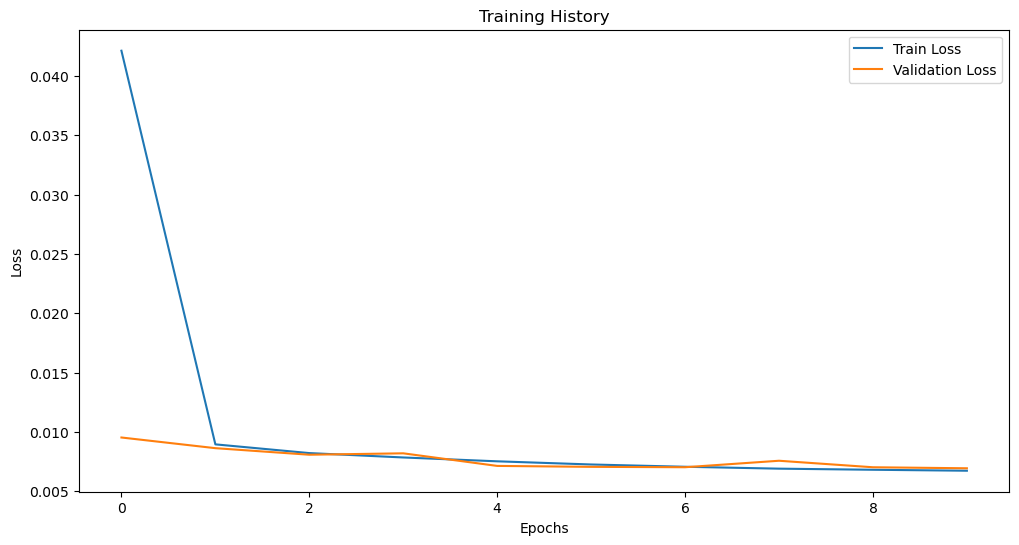

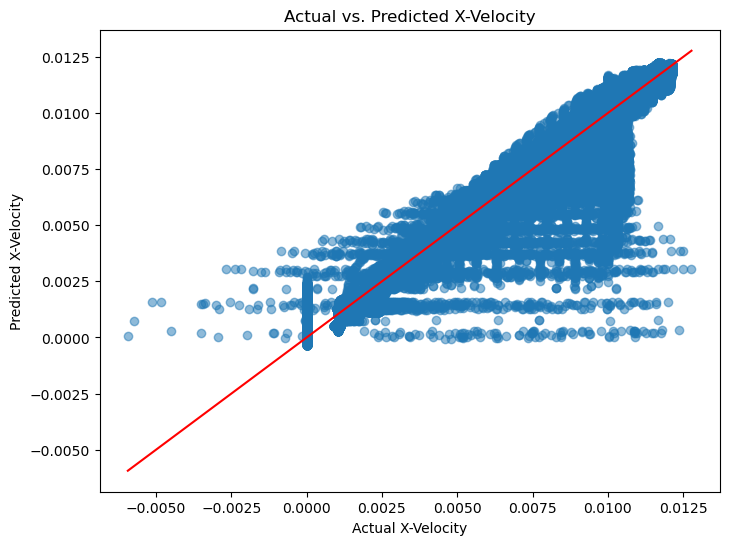


X-Velocity Model Weights:
Layer: hidden1
Weights: [[ 4.5695808e-03  3.4159308e-04 -2.5551760e-01 -2.1166006e-01
   3.8833602e-03 -4.4893146e-01  1.8994639e-03  3.5785334e-03
   9.2148613e-03 -4.6902276e-03  3.3951192e-03  3.8451153e-01
  -3.2545978e-01 -3.2192671e-01  3.8430807e-01  1.7797539e-02]
 [ 4.6577277e-03  5.5238255e-04  5.0519090e-03  3.6419430e-03
  -4.1679607e-04 -6.3156760e-03 -1.9031439e-03  6.9342265e-03
   9.9947089e-03  3.7524758e-03 -1.9304900e-03  8.2855746e-03
   7.0591178e-03  2.0537741e-02  2.9179726e-02  7.1504088e-03]
 [ 3.6138985e-01  1.0727936e-04 -2.2277309e-02  2.5355411e-01
   3.9988229e-01 -3.7115272e-02  4.5666847e-01  5.5436337e-01
   2.9863334e-01  1.6615206e-03 -2.0402189e-02  4.1871961e-02
   2.8130688e-02  2.0528601e-02 -2.5980279e-02 -1.9767441e-02]
 [ 2.4327321e-01 -7.9043829e-01 -3.5898921e-01  2.5442783e-02
   8.5297781e-01 -3.2925057e-01 -2.4540421e-01 -2.3935325e-01
  -4.4188306e-01 -5.8703071e-01  7.1522999e-01  2.7764428e-01
   6.2127757e-01

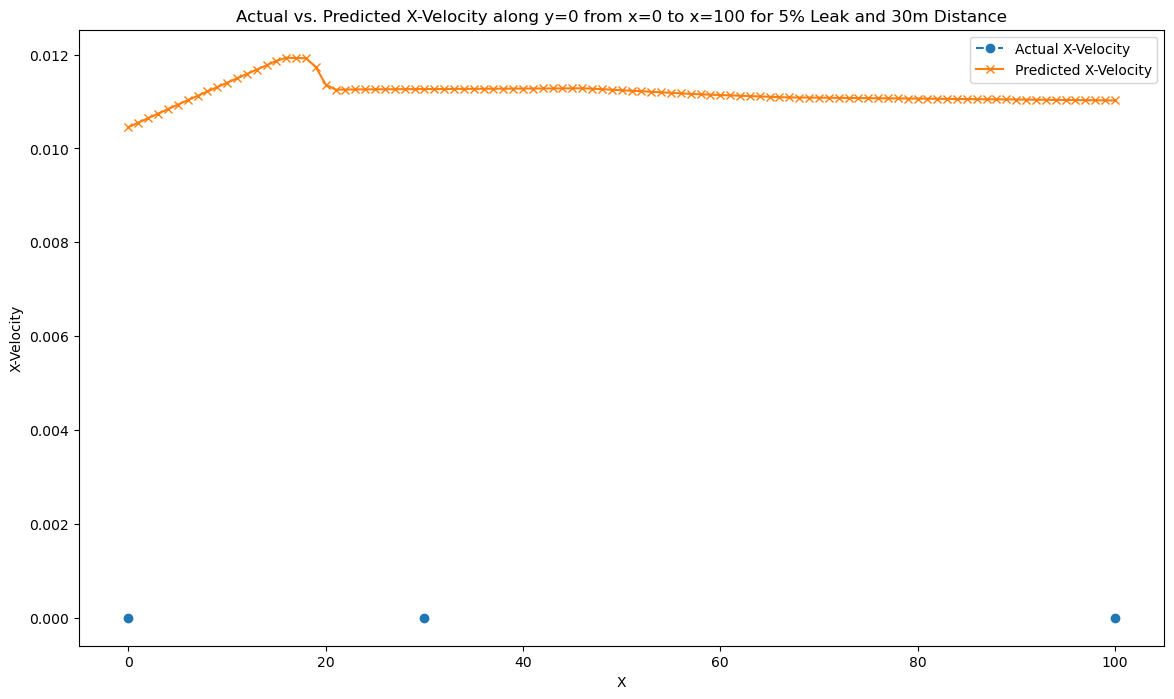

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the folder containing the data files
data_folder = 'data'

# Define the percentages and distances
percentages = [2.5, 5, 7.5]
distances = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Function to load additional input data and output data from a text file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skip the first row
        for line in lines:
            try:
                data.append(list(map(float, line.strip().split(',')[1:])))  # Split on commas, skip the first column, convert to float
            except ValueError:
                continue  # Skip lines that can't be converted to float
    data = np.array(data)
    additional_input = data[:, :2]  # First 2 columns are the additional input features
    output = data[:, 3]             # The fourth column is the target output (x-velocity)
    return additional_input, output

# Improved function to extract percentage and distance from file path
def extract_percentage_distance(file_path):
    filename = os.path.basename(file_path)
    percentage, distance = filename.split('_')
    percentage = float(percentage[:-1])
    distance = float(distance[:-5])
    return percentage, distance

# Collect all file paths
file_paths = []
for percentage in percentages:
    for distance in distances:
        file_path = os.path.join(data_folder, f'{percentage}%_{distance}m.txt')
        if os.path.exists(file_path):
            file_paths.append(file_path)

# Load all data to fit the scalers
all_input = []
all_output = []

for file_path in file_paths:
    additional_input, output = load_data(file_path)
    percentage, distance = extract_percentage_distance(file_path)
    predefined_input = np.array([[percentage, distance]] * additional_input.shape[0])
    full_input = np.hstack((predefined_input, additional_input))
    all_input.append(full_input)
    all_output.append(output)

all_input = np.vstack(all_input)
all_output = np.hstack(all_output)

# Normalize the input data
input_scaler = StandardScaler()
all_input_scaled = input_scaler.fit_transform(all_input)

# Normalize the output data
output_scaler = StandardScaler()
all_output_scaled = output_scaler.fit_transform(all_output.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_input_scaled, all_output_scaled, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1000).shuffle(buffer_size=1024)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1000)

# Define the model architecture
def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='input_layer')
    hidden1 = Dense(16, activation='relu', name='hidden1')(input_layer)
    hidden2 = Dense(8, activation='relu', name='hidden2')(hidden1)
    hidden3 = Dense(4, activation='relu', name='hidden3')(hidden2)
    output_layer = Dense(1, activation='linear', name='output_layer')(hidden3)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Build and compile the model
model = build_model((4,))  # Adjusted input shape
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Increased the number of epochs
    validation_data=test_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the model
loss, mse, mae = model.evaluate(test_dataset)

# Calculate R^2 score
predictions_scaled = model.predict(X_test)
predictions = output_scaler.inverse_transform(predictions_scaled.flatten().reshape(-1, 1)).flatten()
y_test_original = output_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
r2 = r2_score(y_test_original, predictions)

# Print the evaluation metrics
print(f'Loss: {loss}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted x-velocity
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r')
plt.xlabel('Actual X-Velocity')
plt.ylabel('Predicted X-Velocity')
plt.title('Actual vs. Predicted X-Velocity')
plt.show()

# Function to get layer weights
def get_layer_weights(model):
    for layer in model.layers:
        if hasattr(layer, 'kernel'):
            weights, biases = layer.get_weights()
            print(f'Layer: {layer.name}')
            print(f'Weights: {weights}')
            print(f'Biases: {biases}\n')

print('\nX-Velocity Model Weights:')
get_layer_weights(model)

# Function to predict new values
def predict_new_value(model, input_scaler, output_scaler, new_input):
    new_input_scaled = input_scaler.transform(new_input)
    prediction_scaled = model.predict(new_input_scaled)
    prediction = output_scaler.inverse_transform(prediction_scaled)
    return prediction

# Example usage of predict_new_value function
new_input = np.array([[2.5, 20, 1.2, 0.8]])
new_x_velocity_prediction = predict_new_value(model, input_scaler, output_scaler, new_input)

print('Predicted X-Velocity:', new_x_velocity_prediction)

# Plot actual and predicted x-velocity along y=0 from x=0 to x=100 for one leak distance and diameter
# Here we choose one distance and diameter from the dataset for plotting
chosen_percentage = 5
chosen_distance = 30

intervals = np.linspace(0, 100, 101)
actual_values = []
predicted_values = []

for x in intervals:
    # Retrieve the actual values from the dataset
    condition = (all_input[:, 0] == chosen_percentage) & (all_input[:, 1] == chosen_distance) & (all_input[:, 2] == x)
    actual_value = all_output[condition]
    actual_values.append(actual_value[0] if len(actual_value) > 0 else np.nan)
    
    # Get the predicted values from the model
    input_data = np.array([[chosen_percentage, chosen_distance, x, 0]])
    predicted_x_velocity = predict_new_value(model, input_scaler, output_scaler, input_data)
    predicted_values.append(predicted_x_velocity.flatten()[0])

plt.figure(figsize=(14, 8))
plt.plot(intervals, actual_values, label='Actual X-Velocity', linestyle='--', marker='o')
plt.plot(intervals, predicted_values, label='Predicted X-Velocity', linestyle='-', marker='x')
plt.xlabel('X')
plt.ylabel('X-Velocity')
plt.title(f'Actual vs. Predicted X-Velocity along y=0 from x=0 to x=100 for {chosen_percentage}% Leak and {chosen_distance}m Distance')
plt.legend()
plt.show()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.1172 - mae: 0.1830 - mse: 0.1172 - val_loss: 0.0147 - val_mae: 0.0746 - val_mse: 0.0147
Epoch 2/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - loss: 0.0141 - mae: 0.0715 - mse: 0.0141 - val_loss: 0.0128 - val_mae: 0.0670 - val_mse: 0.0128
Epoch 3/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - loss: 0.0120 - mae: 0.0643 - mse: 0.0120 - val_loss: 0.0112 - val_mae: 0.0617 - val_mse: 0.0112
Epoch 4/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - loss: 0.0108 - mae: 0.0605 - mse: 0.0108 - val_loss: 0.0105 - val_mae: 0.0599 - val_mse: 0.0105
Epoch 5/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - loss: 0.0104 - mae: 0.0593 - mse: 0.0104 - val_loss: 0.0105 - val_mae: 0.0606 - val_mse: 0.0105
Epoch 6/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - loss: 0.0102 - mae: 0.0589 - mse: 0.0102 - val_loss: 0.0104 - val_mae: 0.0595 - val_mse: 0.0104
Epoch 7/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - loss: 0.010

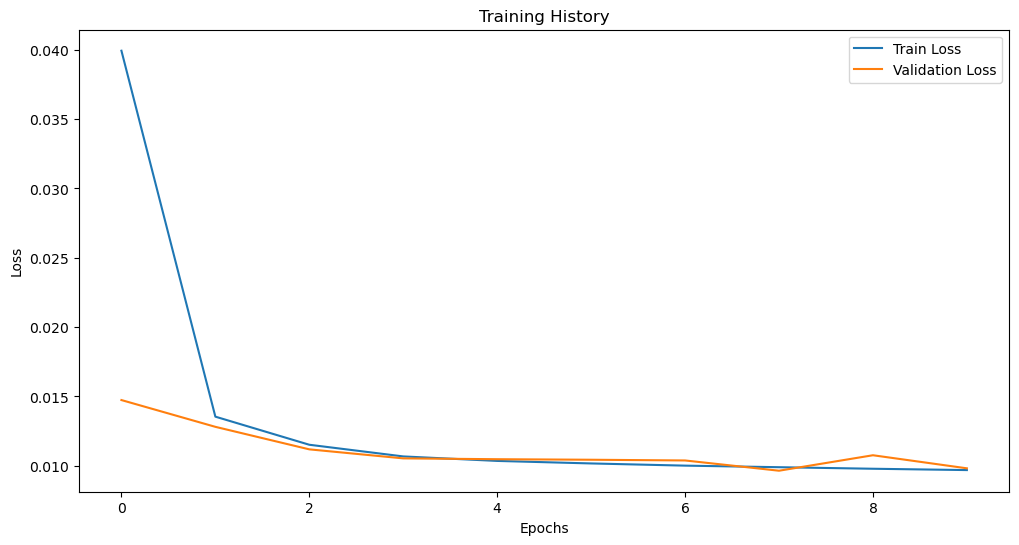

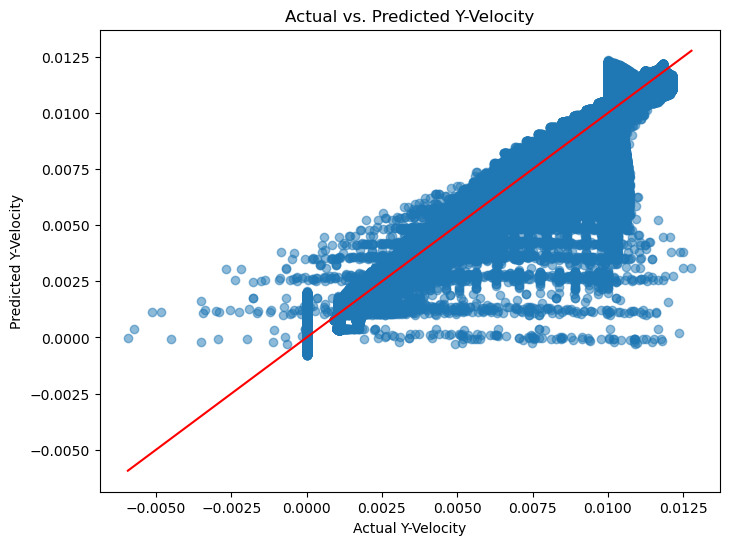

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the folder containing the data files
data_folder = 'data'

# Define the percentages and distances
percentages = [2.5, 5, 7.5]
distances = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Function to load additional input data and output data from a text file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skip the first row
        for line in lines:
            try:
                data.append(list(map(float, line.strip().split(',')[1:])))  # Split on commas, skip the first column, convert to float
            except ValueError:
                continue  # Skip lines that can't be converted to float
    data = np.array(data)
    additional_input = data[:, :2]  # First 2 columns are the additional input features
    y_velocity = data[:, 3]         # The fourth column is the target output (y-velocity)
    return additional_input, y_velocity

# Improved function to extract percentage and distance from file path
def extract_percentage_distance(file_path):
    filename = os.path.basename(file_path)
    percentage, distance = filename.split('_')
    percentage = float(percentage[:-1])
    distance = float(distance[:-5])
    return percentage, distance

# Collect all file paths
file_paths = []
for percentage in percentages:
    for distance in distances:
        file_path = os.path.join(data_folder, f'{percentage}%_{distance}m.txt')
        if os.path.exists(file_path):
            file_paths.append(file_path)

# Load all data to fit the scalers
all_input = []
all_y_velocity = []

for file_path in file_paths:
    additional_input, y_velocity = load_data(file_path)
    percentage, distance = extract_percentage_distance(file_path)
    predefined_input = np.array([[percentage, distance]] * additional_input.shape[0])
    full_input = np.hstack((predefined_input, additional_input))
    x_leak_diff = full_input[:, 3] - full_input[:, 1]
    full_input = np.hstack((full_input, x_leak_diff.reshape(-1, 1)))
    all_input.append(full_input)
    all_y_velocity.append(y_velocity)

all_input = np.vstack(all_input)
all_y_velocity = np.hstack(all_y_velocity)

# Normalize the input data
input_scaler = StandardScaler()
all_input_scaled = input_scaler.fit_transform(all_input)

# Normalize the output data (y-velocity)
y_velocity_scaler = StandardScaler()
all_y_velocity_scaled = y_velocity_scaler.fit_transform(all_y_velocity.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_input_scaled, all_y_velocity_scaled, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1000).shuffle(buffer_size=1024)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1000)

# Define the model architecture
def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='input_layer')
    hidden1 = Dense(16, activation='relu', name='hidden1')(input_layer)
    hidden2 = Dense(8, activation='relu', name='hidden2')(hidden1)
    hidden3 = Dense(4, activation='relu', name='hidden3')(hidden2)
    output_layer = Dense(1, activation='linear', name='output_layer')(hidden3)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Build and compile the model
model = build_model((5,))  # Adjusted input shape
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the model
loss, mse, mae = model.evaluate(test_dataset)

# Calculate R^2 score
predictions_scaled = model.predict(X_test)
predictions = y_velocity_scaler.inverse_transform(predictions_scaled.flatten().reshape(-1, 1)).flatten()
y_test_original = y_velocity_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
r2 = r2_score(y_test_original, predictions)

# Print the evaluation metrics
print(f'Loss: {loss}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

# Get parameters of the dense layers
for layer in model.layers:
    if 'dense' in layer.name:
        print(f'Layer {layer.name}:')
        print(f'  Weights: {layer.get_weights()[0]}')
        print(f'  Biases: {layer.get_weights()[1]}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted y-velocity
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r')
plt.xlabel('Actual Y-Velocity')
plt.ylabel('Predicted Y-Velocity')
plt.title('Actual vs. Predicted Y-Velocity')
plt.show()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - loss: 0.0357 - mae: 0.0626 - mse: 0.0357 - val_loss: 7.7202e-04 - val_mae: 0.0075 - val_mse: 7.7202e-04
Epoch 2/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - loss: 7.0501e-04 - mae: 0.0067 - mse: 7.0501e-04 - val_loss: 7.3674e-04 - val_mae: 0.0072 - val_mse: 7.3674e-04
Epoch 3/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 6.8272e-04 - mae: 0.0066 - mse: 6.8272e-04 - val_loss: 7.0749e-04 - val_mae: 0.0066 - val_mse: 7.0749e-04
Epoch 4/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 6.7641e-04 - mae: 0.0064 - mse: 6.7641e-04 - val_loss: 6.9702e-04 - val_mae: 0.0056 - val_mse: 6.9702e-04
Epoch 5/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 6.7116e-04 - mae: 0.0063 - mse: 6.7116e-04 - val_loss: 6.9838e-04 - val_mae: 0.0055 - val_mse: 6.9838e-04
Epoch 6/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 6.6826e-04 - mae: 0.0062 - mse: 6.6826e-04 - val_loss: 7.0357e-04 - val_mae: 0.0068 - va

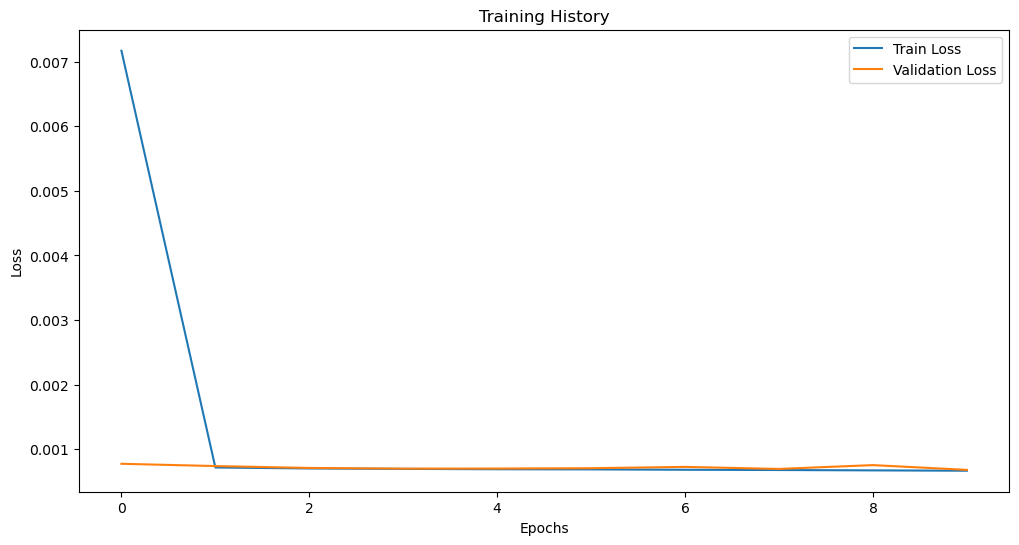

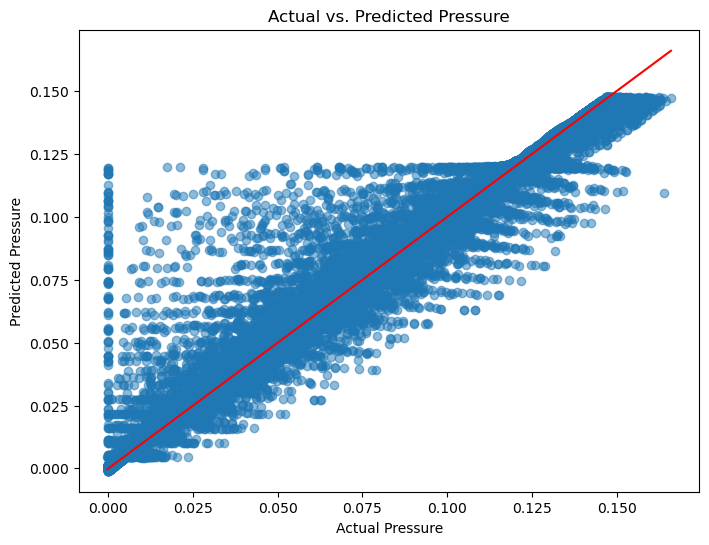

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

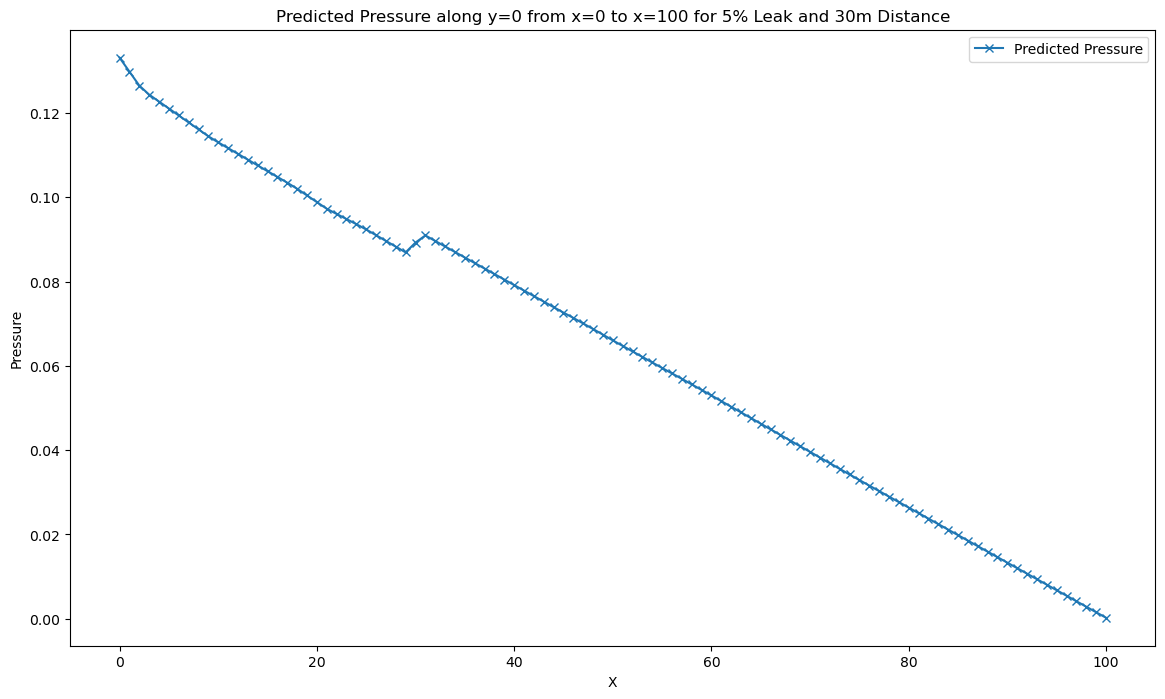

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the folder containing the data files
data_folder = 'data'

# Define the percentages and distances
percentages = [2.5, 5, 7.5]
distances = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Function to load additional input data and output data from a text file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skip the first row
        for line in lines:
            try:
                data.append(list(map(float, line.strip().split(',')[1:])))  # Split on commas, skip the first column, convert to float
            except ValueError:
                continue  # Skip lines that can't be converted to float
    data = np.array(data)
    additional_input = data[:, :2]  # First 2 columns are the additional input features
    output = data[:, 2]             # The first column is the target output (pressure)
    return additional_input, output

# Improved function to extract percentage and distance from file path
def extract_percentage_distance(file_path):
    filename = os.path.basename(file_path)
    percentage, distance = filename.split('_')
    percentage = float(percentage[:-1])
    distance = float(distance[:-5])
    return percentage, distance

# Collect all file paths
file_paths = []
for percentage in percentages:
    for distance in distances:
        file_path = os.path.join(data_folder, f'{percentage}%_{distance}m.txt')
        if os.path.exists(file_path):
            file_paths.append(file_path)

# Load all data to fit the scalers
all_input = []
all_output = []

for file_path in file_paths:
    additional_input, output = load_data(file_path)
    percentage, distance = extract_percentage_distance(file_path)
    predefined_input = np.array([[percentage, distance]] * additional_input.shape[0])
    full_input = np.hstack((predefined_input, additional_input))
    all_input.append(full_input)
    all_output.append(output)

all_input = np.vstack(all_input)
all_output = np.hstack(all_output)

# Normalize the input data
input_scaler = StandardScaler()
all_input_scaled = input_scaler.fit_transform(all_input)

# Normalize the output data
output_scaler = StandardScaler()
all_output_scaled = output_scaler.fit_transform(all_output.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_input_scaled, all_output_scaled, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1000).shuffle(buffer_size=1024)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1000)

# Define the model architecture
def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='input_layer')
    hidden1 = Dense(16, activation='relu', name='hidden1')(input_layer)
    hidden2 = Dense(8, activation='relu', name='hidden2')(hidden1)
    hidden3 = Dense(4, activation='relu', name='hidden3')(hidden2)
    output_layer = Dense(1, activation='linear', name='output_layer')(hidden3)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Build and compile the model
model = build_model((4,))  # Adjusted input shape
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Increased the number of epochs
    validation_data=test_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the model
loss, mse, mae = model.evaluate(test_dataset)

# Calculate R^2 score
predictions_scaled = model.predict(X_test)
predictions = output_scaler.inverse_transform(predictions_scaled.flatten().reshape(-1, 1)).flatten()
y_test_original = output_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
r2 = r2_score(y_test_original, predictions)

# Print the evaluation metrics
print(f'Loss: {loss}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted pressure
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r')
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Actual vs. Predicted Pressure')
plt.show()

# Function to predict new values
def predict_new_value(model, input_scaler, output_scaler, new_input):
    new_input_scaled = input_scaler.transform(new_input)
    prediction_scaled = model.predict(new_input_scaled)
    prediction = output_scaler.inverse_transform(prediction_scaled)
    return prediction

# Save predicted pressure data from x=0 to x=100 along y=0
chosen_percentage = 5
chosen_distance = 30

intervals = np.linspace(0, 100, 101)
predicted_values = []

for x in intervals:
    input_data = np.array([[chosen_percentage, chosen_distance, x, 0]])
    predicted_pressure = predict_new_value(model, input_scaler, output_scaler, input_data)
    predicted_values.append(predicted_pressure.flatten()[0])

# Save predictions to an Excel file
output_file = 'predicted_pressure_data.xlsx'
df = pd.DataFrame({'X': intervals, 'Predicted Pressure': predicted_values})
df.to_excel(output_file, index=False)

print(f'Predicted pressure data saved to {output_file}')

# Plot predicted pressure along y=0 from x=0 to x=100 for chosen_percentage and chosen_distance
plt.figure(figsize=(14, 8))
plt.plot(intervals, predicted_values, label='Predicted Pressure', linestyle='-', marker='x')
plt.xlabel('X')
plt.ylabel('Pressure')
plt.title(f'Predicted Pressure along y=0 from x=0 to x=100 for {chosen_percentage}% Leak and {chosen_distance}m Distance')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

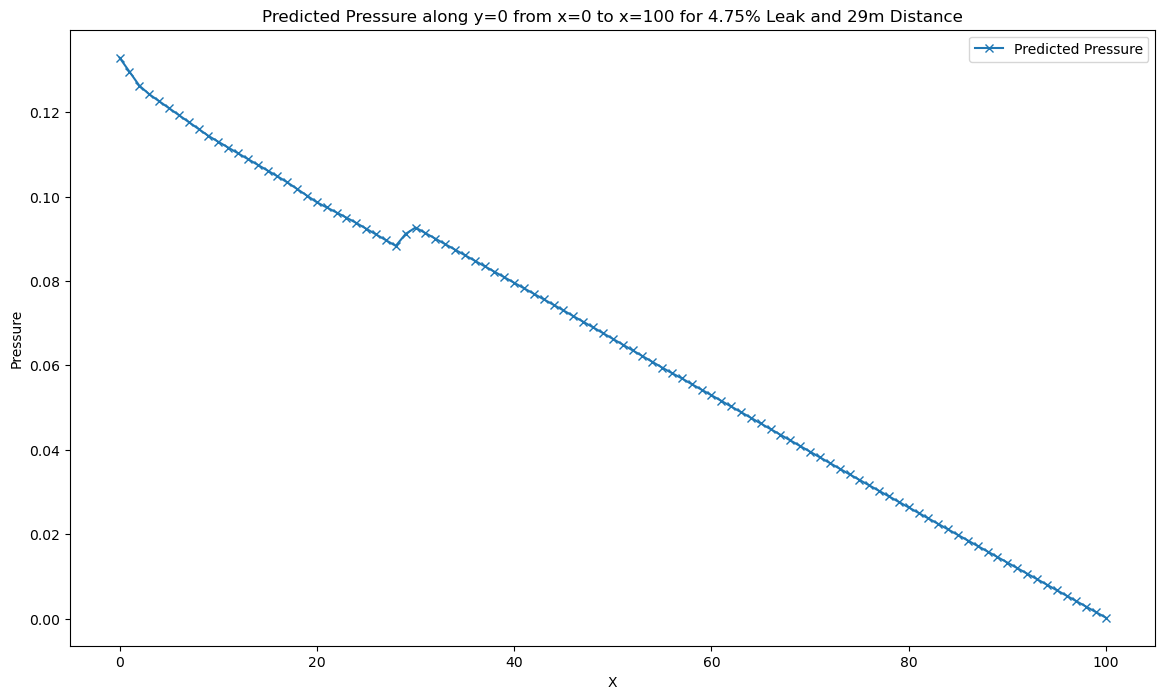

In [7]:
# Save predicted pressure data from x=0 to x=100 along y=0
chosen_percentage = 4.75
chosen_distance = 29

intervals = np.linspace(0, 100, 101)
predicted_values = []

for x in intervals:
    input_data = np.array([[chosen_percentage, chosen_distance, x, 0]])
    predicted_pressure = predict_new_value(model, input_scaler, output_scaler, input_data)
    predicted_values.append(predicted_pressure.flatten()[0])

# Save predictions to an Excel file
output_file = 'predicted_pressure_data.xlsx'
df = pd.DataFrame({'X': intervals, 'Predicted Pressure': predicted_values})
df.to_excel(output_file, index=False)

print(f'Predicted pressure data saved to {output_file}')

# Plot predicted pressure along y=0 from x=0 to x=100 for chosen_percentage and chosen_distance
plt.figure(figsize=(14, 8))
plt.plot(intervals, predicted_values, label='Predicted Pressure', linestyle='-', marker='x')
plt.xlabel('X')
plt.ylabel('Pressure')
plt.title(f'Predicted Pressure along y=0 from x=0 to x=100 for {chosen_percentage}% Leak and {chosen_distance}m Distance')
plt.legend()
plt.show()

Epoch 1/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0610 - mae: 0.0852 - mse: 0.0610 - val_loss: 9.4386e-04 - val_mae: 0.0099 - val_mse: 9.4386e-04
Epoch 2/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 8.3358e-04 - mae: 0.0082 - mse: 8.3358e-04 - val_loss: 8.2968e-04 - val_mae: 0.0078 - val_mse: 8.2968e-04
Epoch 3/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 7.7035e-04 - mae: 0.0072 - mse: 7.7035e-04 - val_loss: 7.8420e-04 - val_mae: 0.0057 - val_mse: 7.8420e-04
Epoch 4/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 7.5506e-04 - mae: 0.0069 - mse: 7.5506e-04 - val_loss: 7.8752e-04 - val_mae: 0.0070 - val_mse: 7.8752e-04
Epoch 5/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 7.4958e-04 - mae: 0.0069 - mse: 7.4958e-04 - val_loss: 7.6688e-04 - val_mae: 0.0061 - val_mse: 7.6688e-04
Epoch 6/10
13129/13129 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 7.4007e-04 - mae: 0.0068 - mse: 7.4007e-04 - val_loss: 7.5759e-04 - val_mae: 0.0058 - va

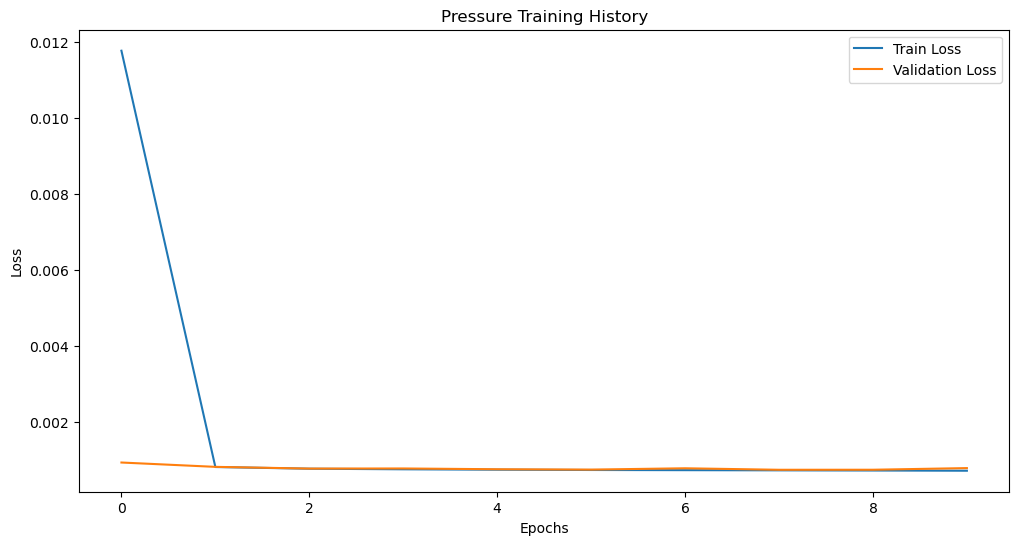

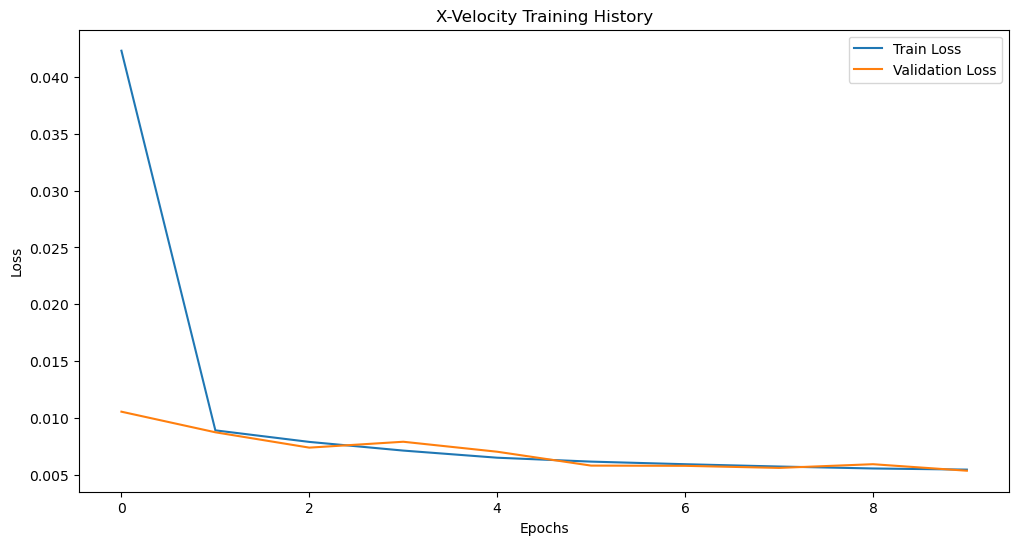

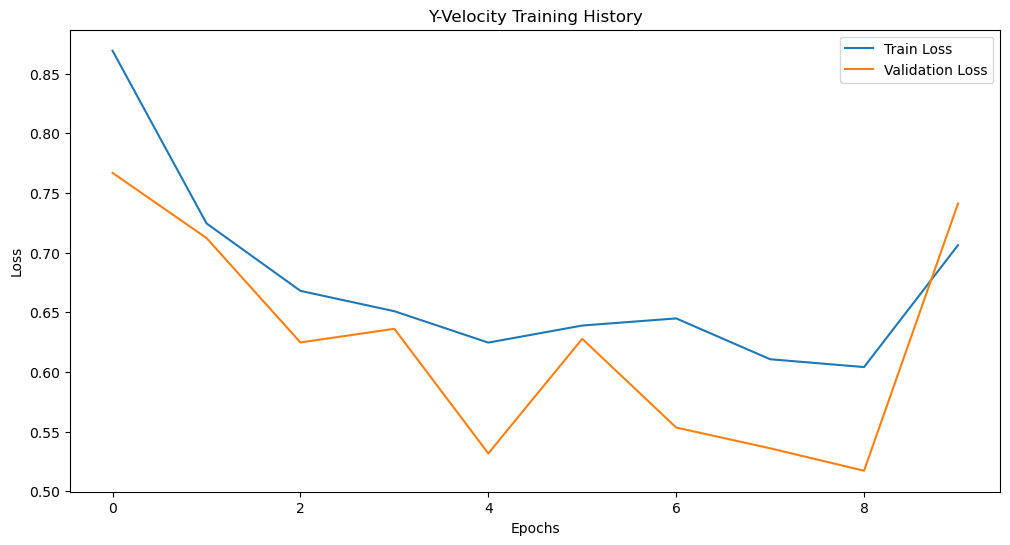

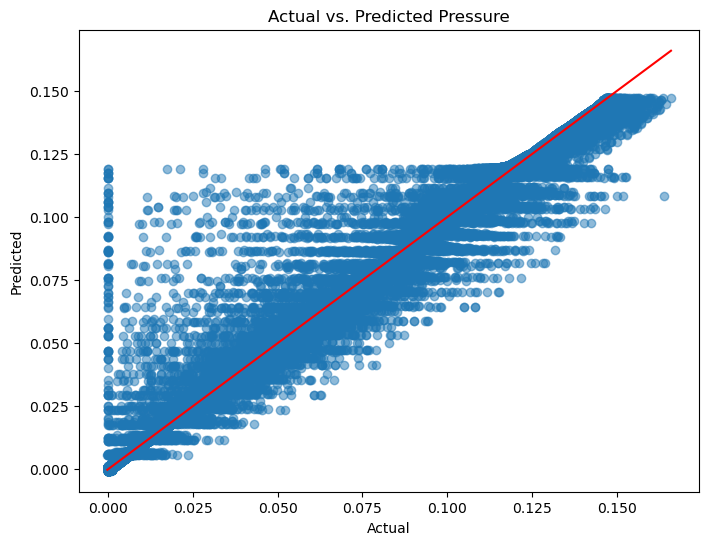

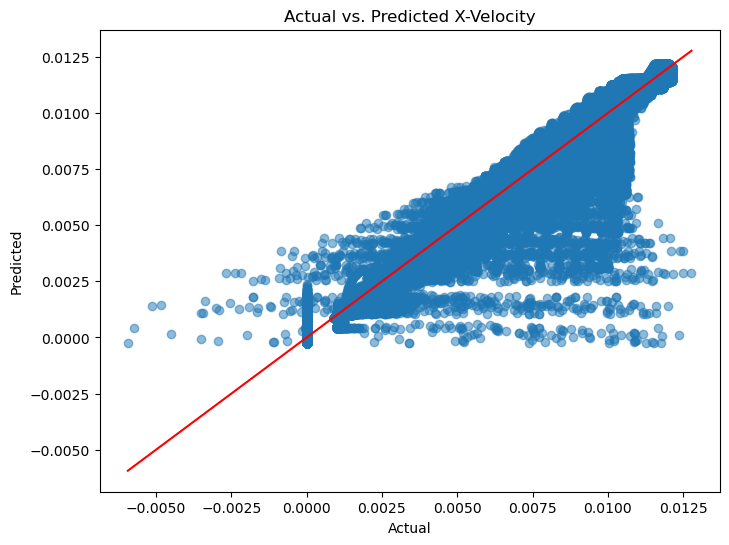

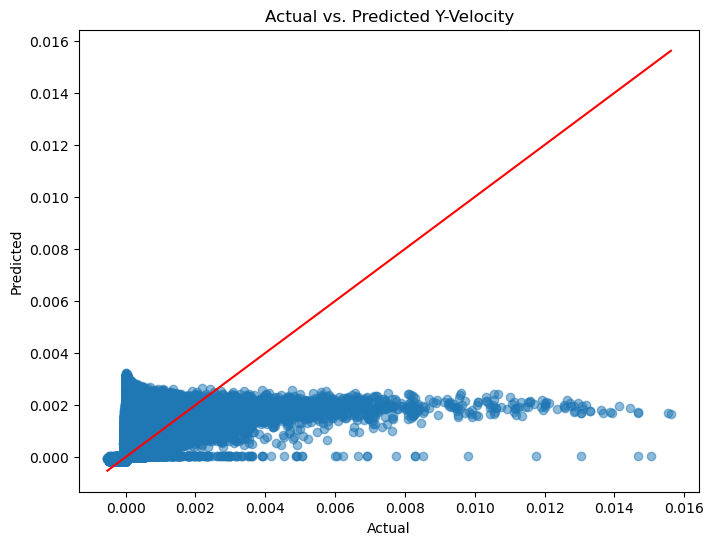


Pressure Model Weights:
Layer: hidden1
Weights: [[-2.4511920e-01 -1.6375770e-01 -1.4289838e-03  4.6036792e-01
   6.3102001e-01  9.2190616e-03  2.0247661e-01  9.0335809e-02
  -3.8859826e-01 -2.2694041e-01  6.1450382e-03 -6.1722040e-01
   4.4575578e-01  1.9230279e-01  9.0437690e-03  3.2253546e-01]
 [ 8.2817525e-02  1.8568151e-01  7.0385683e-01  3.1637719e-01
   4.2376763e-01  3.2765692e-01 -5.2563991e-02  1.9327419e-01
   1.5319344e-01 -2.6533562e-01  6.5144710e-02  2.1504994e-01
  -3.1151706e-01  3.4114712e-01  1.2545367e-01  4.8582175e-01]
 [-1.5359505e-01  3.4612215e-01 -1.1262114e+00 -1.3557042e-01
  -4.5534334e-01  6.4027190e-01  5.1352954e-01 -3.4182084e-01
   4.9773246e-01 -5.6570089e-01 -8.2367206e-01 -1.2436614e-02
   3.3221641e-01 -3.1699693e-01 -7.3813725e-01  1.6974460e-01]
 [-9.5105823e-03 -7.4733226e-03  1.5356104e-02 -5.5993494e-04
  -4.6808789e-03 -3.9827335e-03  6.9861097e-05 -7.3337401e-03
  -2.0453497e-04  4.3477835e-03  2.1640830e-02 -5.9878766e-03
   6.1959825e-03  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Pressure: [[0.18105553]]
Predicted X-Velocity: [[-0.09622144]]
Predicted Y-Velocity: [[-3.567908e-05]]


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the folder containing the data files
data_folder = 'data'

# Define the percentages and distances
percentages = [2.5, 5, 7.5]
distances = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Function to load additional input data and output data from a text file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skip the first row
        for line in lines:
            try:
                data.append(list(map(float, line.strip().split(',')[1:])))  # Split on commas, skip the first column, convert to float
            except ValueError:
                continue  # Skip lines that can't be converted to float
    data = np.array(data)
    additional_input = data[:, :2]  # First 2 columns are the additional input features
    output = data[:, 2:5]           # Columns for pressure, x-velocity, y-velocity
    return additional_input, output

# Improved function to extract percentage and distance from file path
def extract_percentage_distance(file_path):
    filename = os.path.basename(file_path)
    percentage, distance = filename.split('_')
    percentage = float(percentage[:-1])
    distance = float(distance[:-5])
    return percentage, distance

# Collect all file paths
file_paths = []
for percentage in percentages:
    for distance in distances:
        file_path = os.path.join(data_folder, f'{percentage}%_{distance}m.txt')
        if os.path.exists(file_path):
            file_paths.append(file_path)

# Load all data to fit the scalers
all_input = []
all_output = []

for file_path in file_paths:
    additional_input, output = load_data(file_path)
    percentage, distance = extract_percentage_distance(file_path)
    predefined_input = np.array([[percentage, distance]] * additional_input.shape[0])
    full_input = np.hstack((predefined_input, additional_input))
    x_leak_diff = full_input[:, 3] - full_input[:, 1]
    full_input = np.hstack((full_input, x_leak_diff.reshape(-1, 1)))
    all_input.append(full_input)
    all_output.append(output)

all_input = np.vstack(all_input)
all_output = np.vstack(all_output)

# Normalize the input data
input_scaler = StandardScaler()
all_input_scaled = input_scaler.fit_transform(all_input)

# Normalize the output data for pressure, x-velocity, and y-velocity
output_scaler_pressure = StandardScaler()
output_scaler_x_velocity = StandardScaler()
output_scaler_y_velocity = StandardScaler()

all_output_scaled_pressure = output_scaler_pressure.fit_transform(all_output[:, 0].reshape(-1, 1)).flatten()
all_output_scaled_x_velocity = output_scaler_x_velocity.fit_transform(all_output[:, 1].reshape(-1, 1)).flatten()
all_output_scaled_y_velocity = output_scaler_y_velocity.fit_transform(all_output[:, 2].reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train_pressure, y_test_pressure = train_test_split(all_input_scaled, all_output_scaled_pressure, test_size=0.2, random_state=42)
_, _, y_train_x_velocity, y_test_x_velocity = train_test_split(all_input_scaled, all_output_scaled_x_velocity, test_size=0.2, random_state=42)
_, _, y_train_y_velocity, y_test_y_velocity = train_test_split(all_input_scaled, all_output_scaled_y_velocity, test_size=0.2, random_state=42)

# Create TensorFlow datasets
batch_size = 1000
train_dataset_pressure = tf.data.Dataset.from_tensor_slices((X_train, y_train_pressure)).batch(batch_size).shuffle(buffer_size=1024)
test_dataset_pressure = tf.data.Dataset.from_tensor_slices((X_test, y_test_pressure)).batch(batch_size)
train_dataset_x_velocity = tf.data.Dataset.from_tensor_slices((X_train, y_train_x_velocity)).batch(batch_size).shuffle(buffer_size=1024)
test_dataset_x_velocity = tf.data.Dataset.from_tensor_slices((X_test, y_test_x_velocity)).batch(batch_size)
train_dataset_y_velocity = tf.data.Dataset.from_tensor_slices((X_train, y_train_y_velocity)).batch(batch_size).shuffle(buffer_size=1024)
test_dataset_y_velocity = tf.data.Dataset.from_tensor_slices((X_test, y_test_y_velocity)).batch(batch_size)

# Define the model architecture
def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='input_layer')
    hidden1 = Dense(16, activation='relu', name='hidden1')(input_layer)
    hidden2 = Dense(8, activation='relu', name='hidden2')(hidden1)
    hidden3 = Dense(4, activation='relu', name='hidden3')(hidden2)
    output_layer = Dense(1, activation='linear', name='output_layer')(hidden3)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Build and compile models for pressure, x-velocity, y-velocity
model_pressure = build_model((5,))
model_x_velocity = build_model((5,))
model_y_velocity = build_model((5,))

optimizer_pressure = Adam(learning_rate=0.001)
optimizer_x_velocity = Adam(learning_rate=0.001)
optimizer_y_velocity = Adam(learning_rate=0.001)

model_pressure.compile(optimizer=optimizer_pressure, loss='mean_squared_error', metrics=['mse', 'mae'])
model_x_velocity.compile(optimizer=optimizer_x_velocity, loss='mean_squared_error', metrics=['mse', 'mae'])
model_y_velocity.compile(optimizer=optimizer_y_velocity, loss='mean_squared_error', metrics=['mse', 'mae'])

# Train the models
history_pressure = model_pressure.fit(train_dataset_pressure, epochs=10, validation_data=test_dataset_pressure, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
history_x_velocity = model_x_velocity.fit(train_dataset_x_velocity, epochs=10, validation_data=test_dataset_x_velocity, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
history_y_velocity = model_y_velocity.fit(train_dataset_y_velocity, epochs=10, validation_data=test_dataset_y_velocity, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

# Evaluate the models
loss_pressure, mse_pressure, mae_pressure = model_pressure.evaluate(test_dataset_pressure)
loss_x_velocity, mse_x_velocity, mae_x_velocity = model_x_velocity.evaluate(test_dataset_x_velocity)
loss_y_velocity, mse_y_velocity, mae_y_velocity = model_y_velocity.evaluate(test_dataset_y_velocity)

# Calculate R^2 scores
predictions_scaled_pressure = model_pressure.predict(X_test)
predictions_pressure = output_scaler_pressure.inverse_transform(predictions_scaled_pressure.flatten().reshape(-1, 1)).flatten()
y_test_original_pressure = output_scaler_pressure.inverse_transform(y_test_pressure.reshape(-1, 1)).flatten()
r2_pressure = r2_score(y_test_original_pressure, predictions_pressure)

predictions_scaled_x_velocity = model_x_velocity.predict(X_test)
predictions_x_velocity = output_scaler_x_velocity.inverse_transform(predictions_scaled_x_velocity.flatten().reshape(-1, 1)).flatten()
y_test_original_x_velocity = output_scaler_x_velocity.inverse_transform(y_test_x_velocity.reshape(-1, 1)).flatten()
r2_x_velocity = r2_score(y_test_original_x_velocity, predictions_x_velocity)

predictions_scaled_y_velocity = model_y_velocity.predict(X_test)
predictions_y_velocity = output_scaler_y_velocity.inverse_transform(predictions_scaled_y_velocity.flatten().reshape(-1, 1)).flatten()
y_test_original_y_velocity = output_scaler_y_velocity.inverse_transform(y_test_y_velocity.reshape(-1, 1)).flatten()
r2_y_velocity = r2_score(y_test_original_y_velocity, predictions_y_velocity)

# Print the evaluation metrics
print('Pressure Model Evaluation:')
print(f'Loss: {loss_pressure}')
print(f'Mean Squared Error (MSE): {mse_pressure}')
print(f'Mean Absolute Error (MAE): {mae_pressure}')
print(f'R^2 Score: {r2_pressure}')

print('\nX-Velocity Model Evaluation:')
print(f'Loss: {loss_x_velocity}')
print(f'Mean Squared Error (MSE): {mse_x_velocity}')
print(f'Mean Absolute Error (MAE): {mae_x_velocity}')
print(f'R^2 Score: {r2_x_velocity}')

print('\nY-Velocity Model Evaluation:')
print(f'Loss: {loss_y_velocity}')
print(f'Mean Squared Error (MSE): {mse_y_velocity}')
print(f'Mean Absolute Error (MAE): {mae_y_velocity}')
print(f'R^2 Score: {r2_y_velocity}')

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_pressure, 'Pressure')
plot_history(history_x_velocity, 'X-Velocity')
plot_history(history_y_velocity, 'Y-Velocity')

# Plot actual vs. predicted values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted {title}')
    plt.show()

plot_predictions(y_test_original_pressure, predictions_pressure, 'Pressure')
plot_predictions(y_test_original_x_velocity, predictions_x_velocity, 'X-Velocity')
plot_predictions(y_test_original_y_velocity, predictions_y_velocity, 'Y-Velocity')

# Function to get layer weights
def get_layer_weights(model):
    for layer in model.layers:
        if hasattr(layer, 'kernel'):
            weights, biases = layer.get_weights()
            print(f'Layer: {layer.name}')
            print(f'Weights: {weights}')
            print(f'Biases: {biases}\n')

print('\nPressure Model Weights:')
get_layer_weights(model_pressure)

print('\nX-Velocity Model Weights:')
get_layer_weights(model_x_velocity)

print('\nY-Velocity Model Weights:')
get_layer_weights(model_y_velocity)

# Function to predict new values
def predict_new_value(model, input_scaler, output_scaler, new_input):
    new_input_scaled = input_scaler.transform(new_input)
    prediction_scaled = model.predict(new_input_scaled)
    prediction = output_scaler.inverse_transform(prediction_scaled)
    return prediction

# Example usage of predict_new_value function
new_input = np.array([[2.5, 20, 1.2, 0.8, 0.3]])
new_pressure_prediction = predict_new_value(model_pressure, input_scaler, output_scaler_pressure, new_input)
new_x_velocity_prediction = predict_new_value(model_x_velocity, input_scaler, output_scaler_x_velocity, new_input)
new_y_velocity_prediction = predict_new_value(model_y_velocity, input_scaler, output_scaler_y_velocity, new_input)

print('Predicted Pressure:', new_pressure_prediction)
print('Predicted X-Velocity:', new_x_velocity_prediction)
print('Predicted Y-Velocity:', new_y_velocity_prediction)
